In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 05: Census

## Table Review: Welcome Survey

Complete this [Class Data Survey](https://forms.gle/Bt7rk5aS16XGyDgr6). Individuals will not be identified. You may leave any answers blank. We'll use this Class Data to use the rest of the quarter. Thank you in advance!

In [4]:
survey = Table.read_table('data/welcome_survey_sp23.csv')
survey

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second Year,2,5,9,Right-handed,Right leg in first,On your right side,"Cat, Dog, Fish, Snake, Lizard",-3
First Year,2,3,8,Right-handed,I don't know,On your back,None,-1
First Year,5,5,8,Right-handed,Right leg in first,On your left side,Bearded dragon,0
Third Year,8,4,5,Right-handed,I don't know,On your back,Bird,0
First Year,3,15,6,Left-handed,Right leg in first,On your back,Bird,0
Second Year,3,1,10,Right-handed,Right leg in first,On your back,Bird,0
First Year,8,7,7,Left-handed,Right leg in first,On your left side,Bird,0
First Year,6,3,7,Right-handed,I don't know,On your right side,Bird,0
Second Year,8,5,7,Right-handed,Left leg in first,On your right side,Bird,0
First Year,3,2,7,Left-handed,Right leg in first,On your right side,Bird,0


### Find average hours of sleep for side sleepers (hint: use [where-predicates](http://www.data8.org/datascience/reference-nb/datascience-reference.html#Table.where-Predicates))

In [13]:
np.mean(survey.where('Sleep position', are.containing('side')).column('Hours of sleep'))

7.0674974039460023

### Average hours of sleep for back sleepers

In [14]:
np.mean(survey.where('Sleep position', are.containing('back')).column('Hours of sleep'))

7.1225895316804406

### Share of students sleeping at least 8 hours

In [18]:
total_number_of_students = survey.num_rows
number_of_long_sleepers = survey.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

number_of_long_sleepers/total_number_of_students

0.3317788141239174

### Subset table with only sleep information

In [20]:
survey.select('Hours of sleep', 'Sleep position')

Hours of sleep,Sleep position
9,On your right side
8,On your back
8,On your left side
5,On your back
6,On your back
10,On your back
7,On your left side
7,On your right side
7,On your right side
7,On your right side


## Discussion Question: NBA Salaries

The table nba has columns PLAYER, POSITION, and SALARY

**Tasks:**
- Rename "'15-'16 SALARY" to "SALARY" using `relabeled()`
- Subset the table to only contain the player name, the position and the salary

In [21]:
nba = Table.read_table('data/nba_salaries.csv')
nba

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [28]:
nba = nba.relabeled("'15-'16 SALARY", 'SALARY')

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


**Tasks:**
- Create an array containing the **names** of all point guards (PG) who make more than 15 MUSD/year. Salaries are given in MUSD

In [37]:
nba.where('POSITION', 'PG').where('SALARY', are.above(15)).column('PLAYER')

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'],
      dtype='<U24')

**Question**:

What does the following return

```python
nba.drop('POSITION')
nba.num_columns
```

In [39]:
nba.drop('POSITION')

PLAYER,TEAM,SALARY
Paul Millsap,Atlanta Hawks,18.6717
Al Horford,Atlanta Hawks,12
Tiago Splitter,Atlanta Hawks,9.75625
Jeff Teague,Atlanta Hawks,8
Kyle Korver,Atlanta Hawks,5.74648
Thabo Sefolosha,Atlanta Hawks,4
Mike Scott,Atlanta Hawks,3.33333
Kent Bazemore,Atlanta Hawks,2
Dennis Schroder,Atlanta Hawks,1.7634
Tim Hardaway Jr.,Atlanta Hawks,1.30452


In [41]:
nba.num_columns

4

---
Back to slides

---

## Census: Population Trends

[A description of the table appears online.](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf)

The Census dataset contain estimates of the US population in each category of sex and age in the years 2010 through 2019. The Census is decennial: it takes place every 10 years. The most recent Census was held in 2020 and the one before that in 2010. The Census Bureau also estimates population changes each year. As explained in the Bureau’s description of its methodology, it “adds the estimated changes to the last decennial census to produce updated population estimates every year.”

In [44]:
data_location = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
data_location = 'data/nc-est2019-agesex-res.csv'

census = Table.read_table(data_location)
census.sort('AGE')

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
1,0,2014276,2014278,2018474,2028430,2007742,2009723,2024511,2037646,2021375,1991761,1951663,1935117
2,0,1929877,1929882,1932956,1934662,1918828,1921535,1930276,1946335,1933398,1902229,1863680,1847935
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
1,1,2030853,2030861,2020235,2025272,2035213,2015723,2018511,2033686,2046917,2030158,1999022,1958585
2,1,1947217,1947229,1937495,1940953,1942336,1926975,1930380,1939447,1955986,1942553,1909808,1871014
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
1,2,2092198,2092202,2088545,2026392,2031333,2042266,2023752,2027455,2042821,2055454,2037249,2005544
2,2,2004731,2004737,2002076,1944262,1947592,1949474,1934959,1938866,1948528,1964591,1949783,1916500
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665


### Subset the table
for now, we are only interested in the population size by sex (`SEX`), age (`AGE`) in 2014 and 2019 (`POPESTIMATE2014`, and `POPESTIMATE2019`).

**Tasks**:
- `POPESTIMATE2014` and `POPESTIMATE2019` are cumbersome. Lets rename them to `2014` and `2019`
- Create a new table containing only the columns we are interested in

In [57]:
census = census.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
census = census.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

**Tasks:**
- How many people above the age of 100 were there in the US in 2014 and 2019?
- How about an age of above 99

**Question:**
- Why don't we see the number of people at age of 101+?


In [58]:
census.where('SEX', 0).where('AGE', are.above_or_equal_to(99))

SEX,AGE,2014,2019
0,99,41277,57124
0,100,70685,100322
0,999,318301008,328239523


---
Back to slides

---

### Sex ratio
The Census form asks respondents to provide the sex of each household member by checking one of two boxes labeled Male and Female. The SEX column contains numeric codes: 1 for male, 2 for female, and 0 for the total.

**Task**:Find ratio of females to males in the US population in 2019
- Remember that `999` contains all ages

In [59]:
males = census.where('SEX', 1)
females = census.where('SEX', 2)

In [66]:
n_males = males.where('AGE', 999).column('2019')
n_females = females.where('AGE', 999).column('2019')

n_females/ (n_males+n_females)

array([ 0.50750195])

**Task**
- Now lets check the ratio for different age groups

In [68]:
females

SEX,AGE,2014,2019
2,0,1930276,1847935
2,1,1930380,1871014
2,2,1934959,1916500
2,3,1956678,1955655
2,4,1960508,1976372
2,5,1961786,1967081
2,6,2024017,1964271
2,7,2031240,1966584
2,8,2014018,1986471
2,9,2009689,1988726


**Task:**
- Create a new table with columns for age and ratios
    - Create a table with only females
    - Create a table with only males
    - Get the age column from either
- plot

In [71]:
ratios = females.column('2019') / (females.column('2019') + males.column('2019'))

In [73]:
females

SEX,AGE,2014,2019
2,0,1930276,1847935
2,1,1930380,1871014
2,2,1934959,1916500
2,3,1956678,1955655
2,4,1960508,1976372
2,5,1961786,1967081
2,6,2024017,1964271
2,7,2031240,1966584
2,8,2014018,1986471
2,9,2009689,1988726


In [78]:
ratio_table = Table().with_columns('ratio', ratios, 
                                   'AGE', females.column('AGE'))
ratio_table = ratio_table.where('AGE', are.below(200))

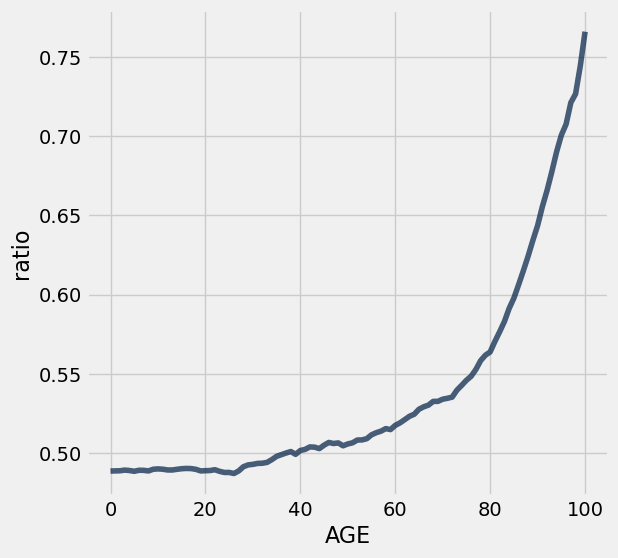

In [79]:
ratio_table.plot('AGE', 'ratio')

### Age change
**Tasks**
- Lets compare the change of population per age group.
- Calculate the absolute change
- Calcluate the relative change

**Tasks**
- Create a new table with the ages and the age changes
- Don't include the *all age row**
- Plot the population change vs the age

Take a look at the top few rows. While the percent change is about 3% for the overall population, it jumps to well over 20% for the people in their late sixties and early seventies. This stunning change contributes to what is known as the greying of America.

What could explain this large increase? 

<details><summary>Answer</summary>
We can explore this question by examining the years in which the relevant groups were born.

Those who were in the age group 69 to 72 in 2014 were born in the years 1942 to 1945. The attack on Pearl Harbor was in late 1941, and by 1942 U.S. forces were heavily engaged in a massive war that ended in 1945.

Those who were 69 to 72 years old in 2019 were born in the years 1947 to 1950, at the height of the post-WWII baby boom in the United States.

The post-war jump in births is a major reason for the large changes that we have observed.
</details>